<font size=6>**Anomaly detection**

**Outliers** là 1 quan sát lệch quá nhiều so với các quan sát khác trong cùng 1 dữ liệu

Nguyên nhân có thể là do:

⚠️ **Noise, unwanted data** 👉 which by themselves are not interesting to the analyst, so eliminate to obtain more accurate

⚠️ **Event of interest** 👉 which become the phenomena, the main objective is to **detect and analyze the outliers itself.**

Đối với dữ liệu timeseries, có 2 loại **input**:
* Univariate Timeseries(main):

<font size=5> $X = \{x_t\}_{t \in T}$
    
* Multivariate Timeseries:
    
<font size=5> $X = \{x_t\}_{t \in T }$
    
<font size=4> $x_t = (x_{1t},x_{2t},...,x_{kt})$

3 loại Outlier:
* Point outliers
* Subsequence outliers
* Timeseries outliers

---

# Point outliers:

## Đặc điểm

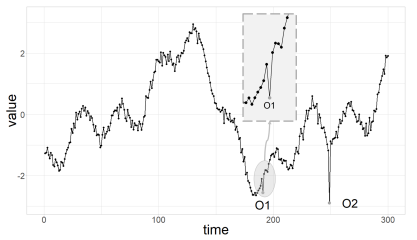

👉 là **1 điểm** thể hiện sự bất thường trong 1 thời điểm cụ thể. 

<span style="color: green; font-size: 24px;">&#10004;</span> Tức là khi so sánh với các điểm <span style="color: red;"> **neighboring points** </span>thì nó thay đổi rất nhiều.<span style="color: red;">**(local outlier)**</span>,

hoặc khi so sánh với **<span style="color: blue;"> tất cả các điểm khác</span>** trong dữ liệu **<span style="color: blue;"> (global outlier)</span>**

👉 2 characteristic chính của point outliers:
* **Temporality**: Tính có thứ tự, đc sắp xếp. Sử dụng trong phương pháp cửa sổ thời gian
* **Streaming/Non-streaming**:
    * Streaming data: dữ liệu liên tục đc tạo ra, kiểu real-time. Do đó, trong streaming outliers, thuật toán cần phải thích ứng được ngay khi có dữ liệu mới thêm vào 
    * Non-streaming data: thường là dữ liệu đc thu nhập và xử lý tại 1 thời điểm cụ thể, không thay đổi theo thời gian 1 cách đồng nhất. Thuật toán detect có thể đc thực hiện trên toàn bộ dữ liệu cùng 1 lúc mà không cần phải xử lý ngay khi thêm dữ liệu mới

---

## Detect

### Model-base:

&#128161; Ý tưởng:

<font size=5> $|x_t-\hat{x_t}| > r$ 

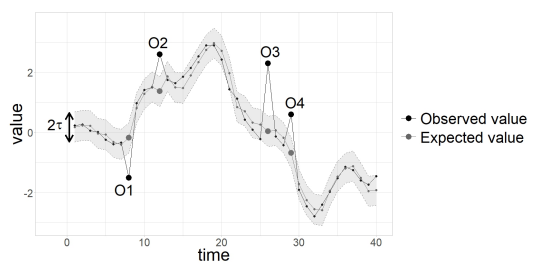

tức là khoảng cách giữa `điểm ở thời gian t` so với `giá trị kỳ vọng` của nó là lớn hơn so với threshold `r` đã đc định nghĩa trước

---

<span style="color: green; font-size: 24px;">&#10004;</span> ` Giá trị kỳ vọng` : <font size=5> $\hat{x_t}$</font>
    có thể được **estimation** bởi:
* Simple estimaiton models: đơn giản là lấy **Median** hoặc **Median Absolute Deviation**,...
* Sophisticated estimation models: Sử dụng một số kỹ thuật phân đoạn 
* Other: Fitted model or distribution:
    * Smoothing methods:B-splines,kernels variants of EWMA method
    * Slope constraints
    * Gaussian Mixture Models (GMM)
    * STL decomposition
    * ARIMA models, linear regression or Artificial Neural Networks(ANNs)
    

🔍 Sử dụng Extreme Studentized Deviation(ESD) test sự xuất hiện điểm outliers:
* $H_0$ the null hypothesis considered is that there no outliers
* $H_1$ there are k outliers

⚠️ Computes <span style="color: red;"> **k test**</span>  to detect <span style="color: red;"> **k-point**</span> outliers

---

<span style="color: green; font-size: 24px;">&#10004;</span> ` Giá trị kỳ vọng` : <font size=5> $\hat{x_t}$</font>
    có thể được **Predict** bởi

* Fixed models:
    * DeepAnt algorithm
    * AR model or an ARIMA model
* The evolution models:
    * Predicts values using the median of its past data
    * Fit an ARIMA model within a sliding window to compute the prediction interval
* Extreme value theory:
    * SPOT, for data following any stationay distribution
    * DSPOT, for data that can be subject to concept drift
* Retrain model periodically or each time a new point arrives:
    * Student-t processes: to compute the prediction interval and updates the covariance matrix with the newly arrived data point.
    * Hierarchical Temporal Memory (HTM) network, which is also a prediction model-based technique that updates incrementally as new observations arrive.


---

### Density-based

<font size=5> $x_t$ là outlier <=> $|\{x \in X |d(x,x_t)≤R\}| < τ$

Trong đó:
* $x_t$ là điểm đang xem xét outliers
* $d(x,x_t)$ là khoảng cách Euclidean của $x_t$ với tất cả các điểm khác trong khoảng đang xét
* R là một giá trị giới hạn khoảng cách được định nghĩa trước
* $τ$ là số điểm tối thiểu cần thõa mãn để không là outlier

<img src='https://scontent-hkg1-2.xx.fbcdn.net/v/t1.15752-9/416033771_402340145515097_8509315275045279209_n.png?_nc_cat=107&ccb=1-7&_nc_sid=8cd0a2&_nc_ohc=BdDb9NTdRygAX9dJH6v&_nc_ht=scontent-hkg1-2.xx&oh=03_AdSKJz54U7x1VQhXnzlAEE-r8eTWxFgXIB3F8TDzo4R9Mw&oe=65E8FB81' style="width:800px;"/>

---

### Histogramming

base on:

<font size=5> $E_X(H^*_B) > E_{X-D}(H^*_{B-|D|})$

Trong đó:
* $E_X(.)$ là tổng lỗi xấp xỉ của histogram (.)
* $H^*_B$ là histogram tối ưu nhất (với sai số xấp xỉ bé nhất) với B buckets, được tính bằng mean giá trị thuộc mỗi bucket
* $D$ là deviant, tức là điểm bị lệch mà thỏa mãn công thức trên
* $X-D,B-|D|$ là số điểm khi bớt đi $D$ deviants, số buckets khi bớt đi $|D|$ buckets chứa $D$

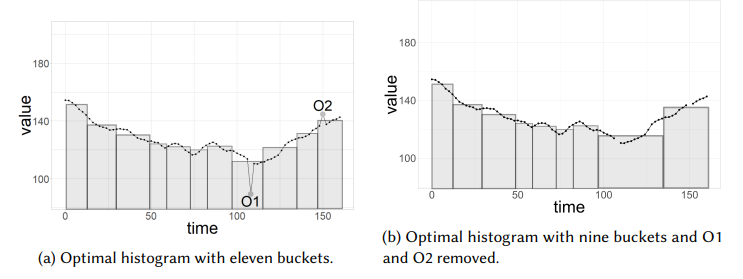

---

## Summary

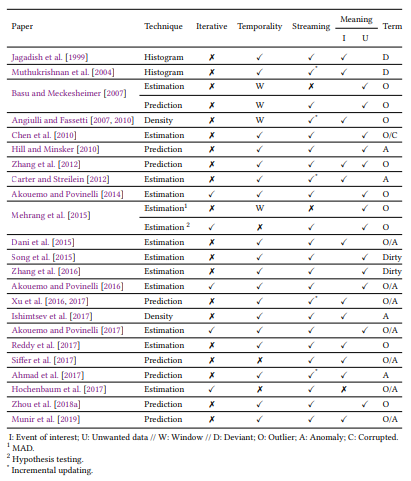

---

# Subsequence outliers

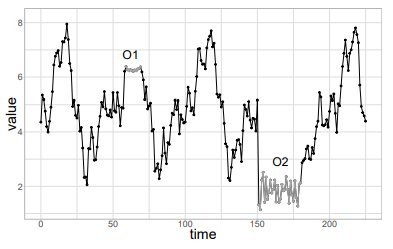

👉 là 1 **thời điểm liên tiếp**, hoặc 1 chuỗi *ngắn(tùy thuộc vào từng data)* thể hiện giá trị không bình thường.

Cũng có 2 loại:
* Global outlier: khi so sánh với các chuỗi khác trong cả timeseries
* Local outlier: Khi so sánh với các chuỗi ngay trước và ngay sau đó

## Characteristics

<span style="color: red;"> **Length**</span>

Chuỗi là một tập hợp các điểm, không phải chỉ 1 điểm nên nó có độ dài nhất định

2 loại length subsequence outliers:
* Fixed-length subsequences : chuỗi có thời gian cố định
* Variable-length subsequences : chuỗi có thời gian thay đổi

Phương pháp phát hiện một `Subsequences` có độ dài xác định cần phải định trước được một độ dài nào đó. 
Và người ta thường thông qua sử dụng phương pháp **sliding window**

<span style="color: red;"> **Representation**</span>

Discretization method is a widely used representation method (PP rời rạc hóa)
* Equal-frequencey binning
* Equal-width binning
* SAX
* bitmaps

Other way to representations on raw data
* Dictionaries
* Exemplars
* Connectivity values

---

<span style="color: red;">**Periodic**</span>

Các Periodic subsequences outlier (Chuỗi ngoại lai có chu kỳ) là các chuỗi bất thường, lặp lại theo thời gian

## Detecting

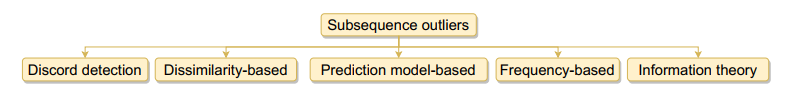

### Discord detection

💡Ý tưởng: sử dụng độ đo khoảng cách để so sánh:

<font size=4> D là Discord/Subsequence Outlier nếu thỏa mãn:

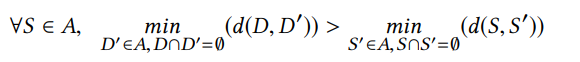

Trong đó:
* D là chuỗi đang xét/nghi vấn outlier
* A là tập tất cả các chuỗi con của X được cắt ra bởi sliding window
* D' là các chuỗi trong A nhưng không trùng/chồng chéo với D
* d(D,D') là `khoảng cách Euclide`

`Euclidean distance`:

<font size = 4> $d(P,Q) = \sqrt{\sum^n_{i=1}(P_i-Q_i)^2}$

trong đó: $P_i, Q_i$ là từng điểm tương ứng trong tập $P$ và $Q$

<span style="color: green; font-size: 24px;">&#10004;</span> Hiểu đơn giản: bỏ đi chuỗi có **khoảng cách lớn nhất** với các chuỗi còn lại. *Khoảng cách* ở đây là 1 độ dài ngắn nhất từ chuỗi đang xét đến các chuỗi còn lại

**Các thuật toán sử dụng ý tưởng trên:**
* Đơn giản nhất: `brute-force`: vét cạn
* HOT-SAX &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;⎱SAX
* Grammar-induction procedures⎰methods (Nén chuỗi thời gian bằng cách biểu diễn chúng thành các ký tự được định nghĩa trước)
* Piecewise Aggregate Approximation (PAA)

---

### Dissimilarity-based

dựa trên việc so sánh trực tiếp các chuỗi con hoặc các **representations** của nó, sử dụng `reference of normality`

Chuỗi con là outlier khi mà có sự khác biệt nhất định(đã định nghĩa trước) so với `normal subsequences`(chuỗi chuẩn) hoặc là $\hat{S}$:

<font size = 4> $s(S,\hat{S})>\tau$

Trong đó:
* $\tau$ là threshold đã đc định nghĩa trước
* $S$ là chuỗi đang phân tích hoặc là **representation** của nó (thường có độ dài cố định, không có chu kỳ, trích xuất từ sliding window)
* $\hat{S}$ là **expected value** của $S$ dựa trên `reference of normality`
* $s$ là độ đo *dissimilarity* hay sự khác biệt giữa 2 chuỗi(thường dùng ở đây là khoảng cách Euclidean)

---

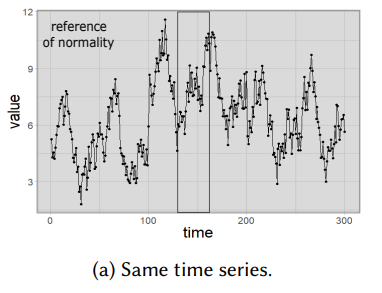

Coi **Same time series** như là `reference of normality`

Thường sử dụng kỹ thuật `Clustering`để nhóm các chuỗi có sự tương đồng với các chuỗi khác, tách các chuỗi con khác nhau thành các cụm khác nhau:

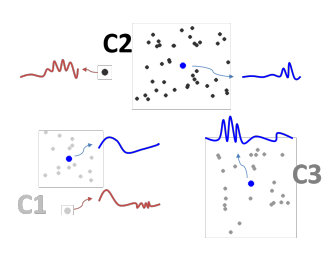

sau đó, ở mỗi cụm, lấy 1 điểm trung tâm làm **$\hat{S}$**

Những điểm nằm ngoài khoảng, tức thỏa mãn bất đẳng thức:

<font size=5> $s(S,\hat{S})>\tau$

<span style="color: green; font-size: 24px;">&#10004;</span> Thì là outliers

---

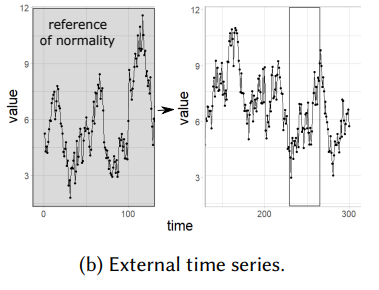

Một số phương pháp thì dựa vào **External time series** như là `reference of normality`

**External time series** được tạo ra bởi nhiều cách khác nhau nhưng cùng 1 quy trình và không có outliers (Chuỗi không có outlier trong quá khứ)

Ở đây, Subsequences được biểu diễn bởi (`represented`) 1 **feature vector** bao gồm 2 thành phần là **Hình dạng(Shape)** và **yếu tố ngẫu nhiên(stochastic variations)** của chuỗi, bằng cách sử dụng các phương pháp smoothing và thống kê(mean,standard deviation..)

&#x1F4DA; VD: Xét chuỗi $S$ và 1 chuỗi có cùng độ dài, tương đồng nhất với $S$ trong toàn bộ chuỗi(quá khứ).Chuỗi $S$ sẽ là **outliers** nếu nó không thể được biểu diễn xấp xỉ tuyến tính với các thành phần của chuỗi $\hat{S}$, tức là độ lệch lớn khi sử dụng `khoảng cách Euclide` trong công thức trên

---

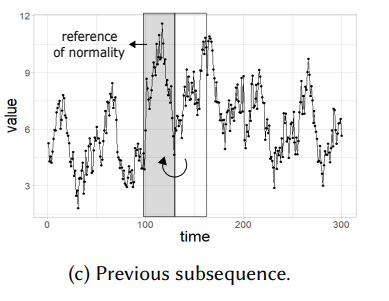

sử dụng chuỗi liền kề ngay trước đó (previous adjacent non-overlapping window) để làm `reference of normality`

Mỗi subsequences được represent bởi 1 **bitmap**, nghĩa là 1 ma trận trong đõ mỗi ô đại diện cho tần số của 1 vùng cục bộ trong 1 subsequences

Sử dụng bình phương `Khoảng cách Euclide` để so sánh mỗi cặp bitmaps, nếu sai lệch giữa chuỗi hiện tại và previous quá lớn thì là **outlier**

------

 ### Prediction model-based

# Timeseries outliers

chỉ có thể detect khi mà `input data` là chuỗi thời gian đa biến: `multivariate` 

<img src='https://scontent-hkg1-1.xx.fbcdn.net/v/t1.15752-9/420692986_1399041150741886_5447971263299827482_n.png?_nc_cat=109&ccb=1-7&_nc_sid=8cd0a2&_nc_ohc=tOj9ug4i-cYAX95zMc6&_nc_oc=AQkNY1OBMthUemuHkcJgeSCTKeUKCQyvSkKJYCx9Xq9NwDMwi9QpgaL6LZW7QrqzQta6h_aTXgJEk1d-Qnpn2TVj&_nc_ht=scontent-hkg1-1.xx&oh=03_AdTcsdmEQTJ3_rTUaVMKin_VReH3WjOJvgx5cnpWMyczjA&oe=65E83B88' style="width:700px;"/>